In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
for module in tf,np:
    print(module.__name__, module.__version__)

tensorflow 2.0.0
numpy 1.17.4


In [3]:
def my_func(x):
    return x ** 2 + x + 1

# compute dx when x == 2
x1 = tf.constant(2.)
with tf.GradientTape() as tape:
    tape.watch(x1)
    f = my_func(x1)
    
print(tape.gradient(f, x1))

tf.Tensor(5.0, shape=(), dtype=float32)


In [4]:
def my_func2(x1, x2):
    return (x1 + 5) * (x2 - 2)
# compute dx1, dx2 at(2,3)
x1 = tf.Variable(2.)
x2 = tf.Variable(3.)
with tf.GradientTape() as tape:
    f = my_func2(x1, x2)
    
print(tape.gradient(f,[x1, x2]))

[<tf.Tensor: id=36, shape=(), dtype=float32, numpy=1.0>, <tf.Tensor: id=37, shape=(), dtype=float32, numpy=7.0>]


In [5]:
x = tf.Variable(5.)
with tf.GradientTape(persistent=True) as tape:
    z1 = 2 * x
    z2 = z1 ** 2
    
print(tape.gradient(z1, x))
print(tape.gradient(z2, z1))
print(tape.gradient(z2, x))
del tape

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(20.0, shape=(), dtype=float32)
tf.Tensor(40.0, shape=(), dtype=float32)


In [6]:
# Higher-order gradient
x = tf.Variable(3.0)
with tf.GradientTape() as tape_out:
    with tf.GradientTape() as tape_in:
        y = x ** 3
    dx_in = tape_in.gradient(y, x)
dx_out = tape_out.gradient(dx_in, x)
print(dx_in)
print(dx_out)

tf.Tensor(27.0, shape=(), dtype=float32)
tf.Tensor(18.0, shape=(), dtype=float32)


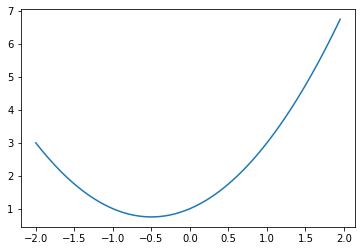

In [7]:
# simulate SGD
# draw my_func
x = np.arange(-2,2,0.05)
y = my_func(x)
plt.plot(x,y)

In [8]:
learning_rate = 0.05
x = tf.Variable(10.)
for _ in range(100):
    with tf.GradientTape() as tape:
        y = my_func(x)
    dz_dx = tape.gradient(y, x)
    x.assign_sub(learning_rate * dz_dx)

print(x)
print(y)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.4997211>
tf.Tensor(0.7500001, shape=(), dtype=float32)


In [9]:
# work with keras optimizer
learning_rate = 0.05
x = tf.Variable(10.)
optimizer = tf.keras.optimizers.SGD(lr = learning_rate)
for _ in range(100):
    with tf.GradientTape() as tape:
        y = my_func(x)
    dz_dx = tape.gradient(y, x)
    optimizer.apply_gradients([(dz_dx, x)])
    #x.assign_sub(learning_rate * dz_dx)

print(x)
print(y)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.4997211>
tf.Tensor(0.7500001, shape=(), dtype=float32)
